# Using LDA due to BERTopic install issues

Need to figure out what I want from this and what I'm trying to show, I think I'm getting too caught up in the end goal instead of enjoying the process.
This looks fun: https://towardsdatascience.com/nlp-on-the-office-series-cf0ed44430d1

In [34]:
#! pip install wordcloud gensim nltk pyldavis pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [45]:
# import packages
import pandas as pd
import re
import matplotlib.pyplot as plt

from wordcloud import WordCloud

import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import gensim.corpora as corpora
from collections import Counter

import pyLDAvis.gensim
import pickle 
import pyLDAvis

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# read in data
transcripts_df = pd.read_csv("transcript_df.csv")
transcripts_df.head(1)

Unnamed: 0            Season  Season Num                    Episode  \
0           0  Survivor: Borneo           1  Episode 1 - The Marooning   

                                                 URL  \
0  https://www.google.com/url?q=https://reality-t...   

                                          actual_URL  \
0  https://reality-tv-transcripts.fandom.com/wiki...   

                                  episode_transcript  
0  Episode 1 - The Marooning\nJEFF PROBST: From t...

In [ ]:
# text cleaning
# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers

In [17]:
transcripts_df['episode_transcript_processed'] = transcripts_df['episode_transcript'].map(lambda x: re.sub('[,\.!?]', '', x))
transcripts_df['episode_transcript_processed'] = transcripts_df['episode_transcript_processed'].map(lambda x: x.lower())
# replace new line characters
transcripts_df['episode_transcript_processed'] = transcripts_df['episode_transcript_processed'].str.replace('\n', ' ')
transcripts_df.head(1)

Unnamed: 0            Season  Season Num                    Episode  \
0           0  Survivor: Borneo           1  Episode 1 - The Marooning   

                                                 URL  \
0  https://www.google.com/url?q=https://reality-t...   

                                          actual_URL  \
0  https://reality-tv-transcripts.fandom.com/wiki...   

                                  episode_transcript  \
0  Episode 1 - The Marooning\nJEFF PROBST: From t...   

                        episode_transcript_processed  
0  episode 1 - the marooning jeff probst: from th...

Survivor: Borneo


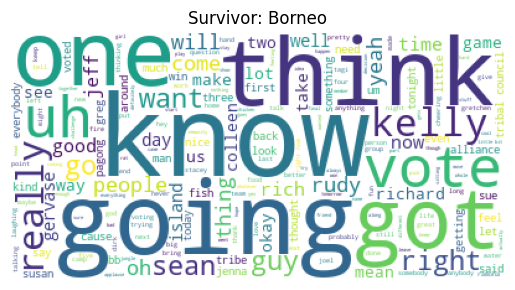

Survivor: The Australian Outback


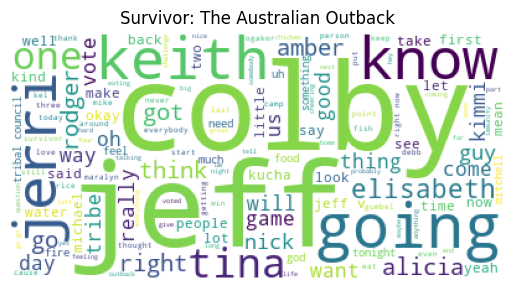

Survivor: Africa


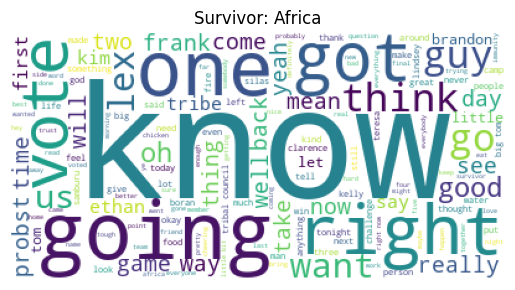

Survivor: Marquesas


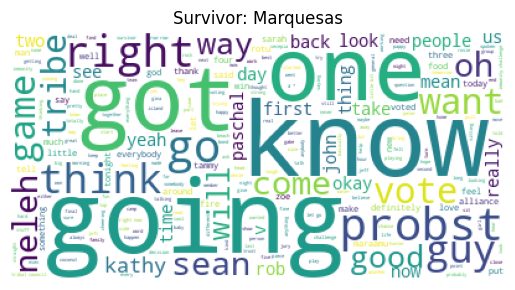

Survivor: Thailand


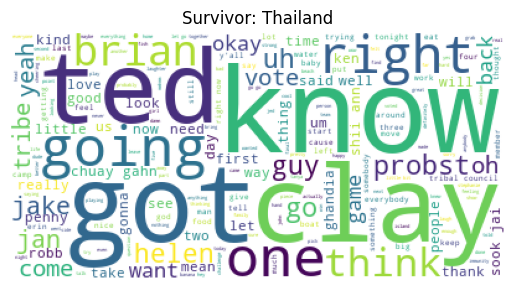

Survivor: The Amazon


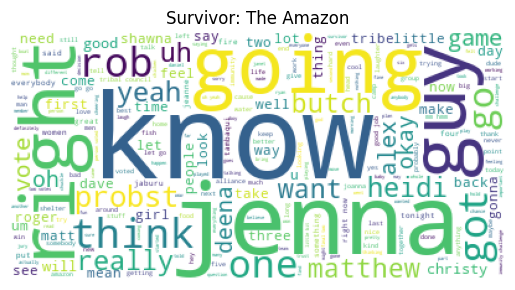

Survivor: Pearl Islands


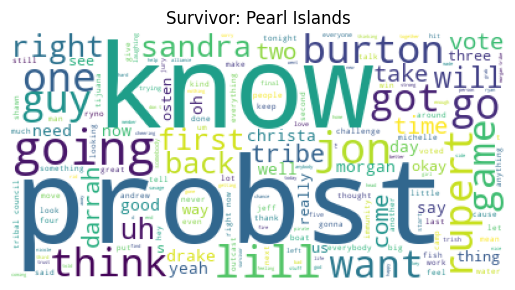

Survivor: All-Stars


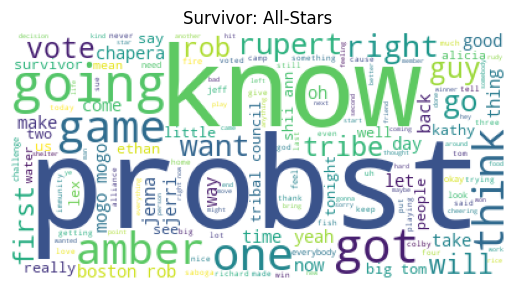

Survivor: Vanuatu


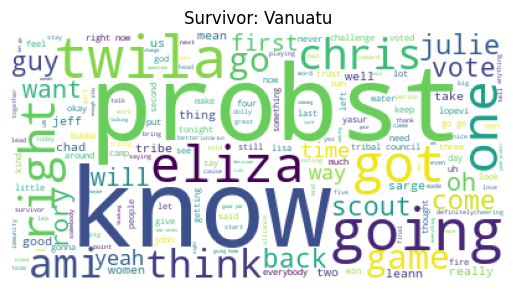

Survivor: Palau


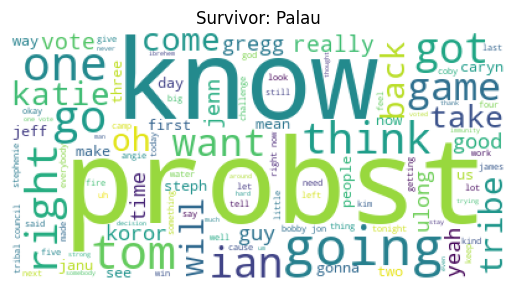

Survivor: Guatemala


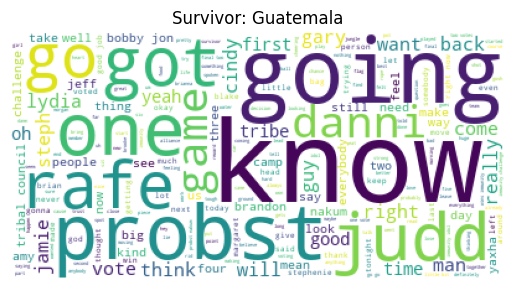

Survivor: Panama


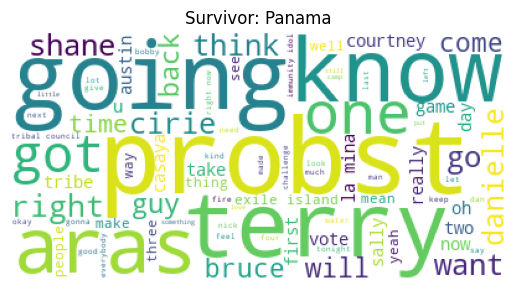

Survivor: Cook Islands


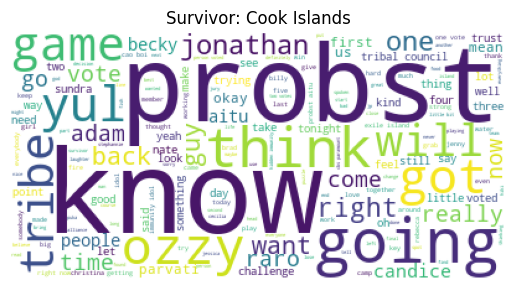

Survivor: Fiji


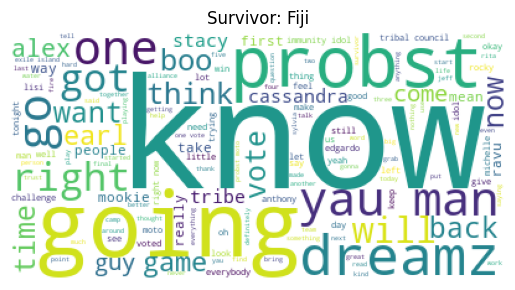

Survivor: China


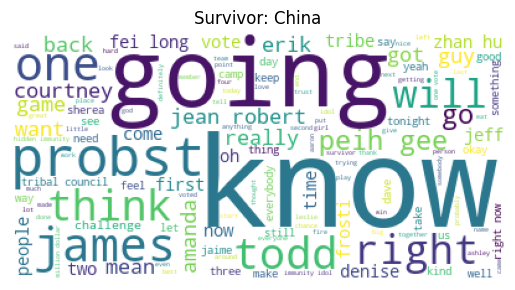

Survivor: Micronesia


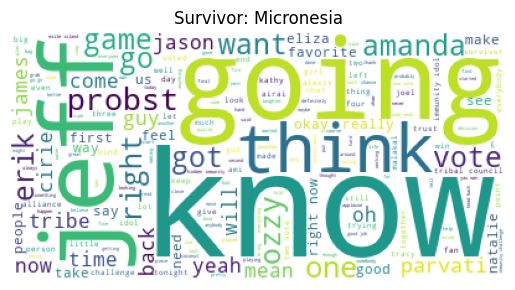

Survivor: Gabon


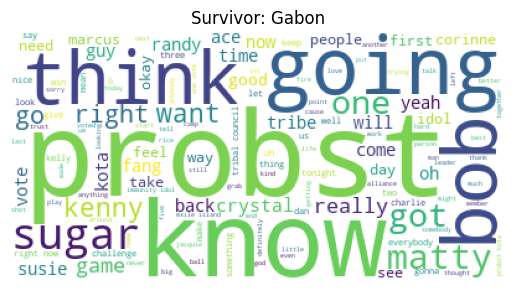

Survivor: Tocantins


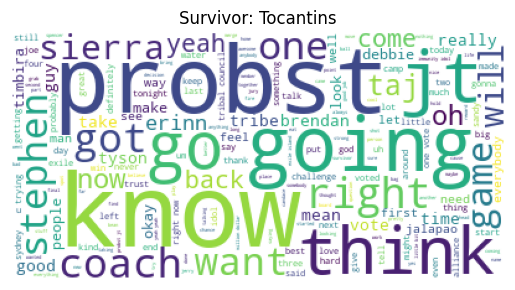

Survivor: Samoa


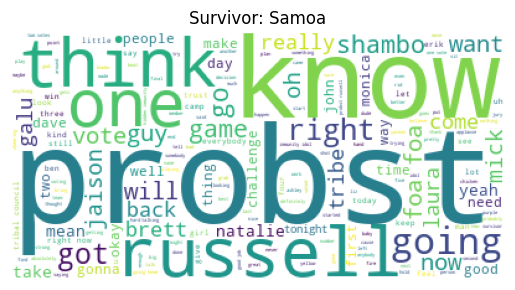

Survivor: Heroes vs Villains


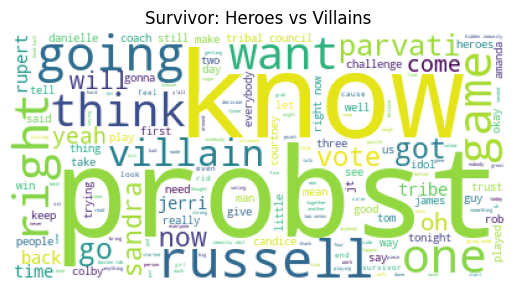

Survivor: Nicaragua


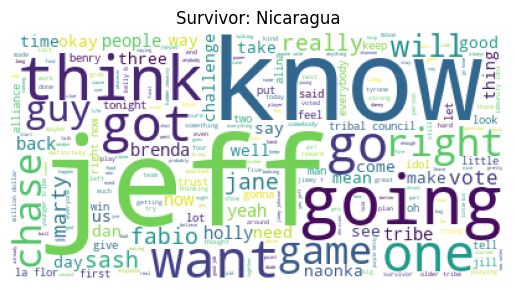

Survivor: Redemption Island


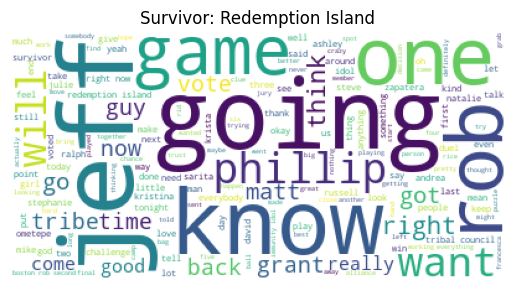

Survivor: South Pacific


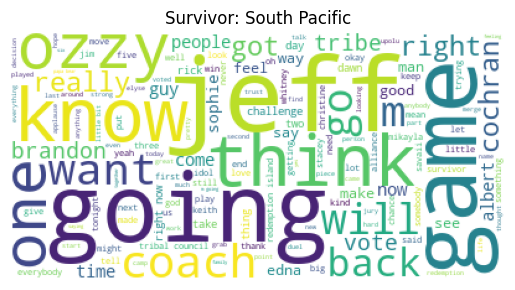

Survivor: One World


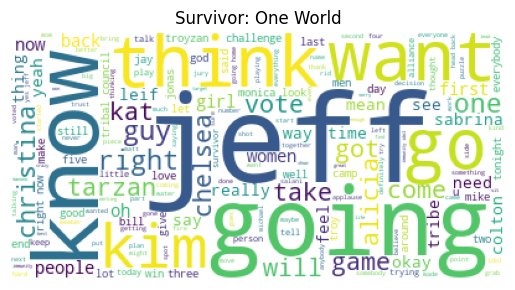

Survivor: Philippines


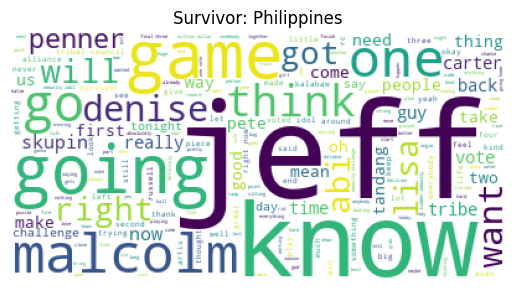

Survivor: Caramoan


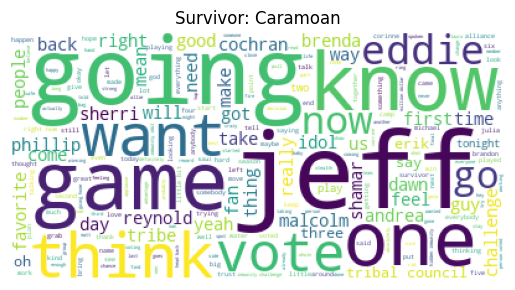

Survivor: Blood vs Water


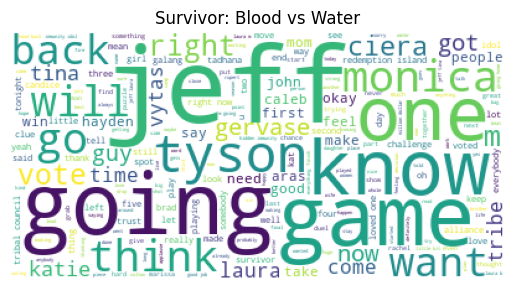

Survivor: Cagayan


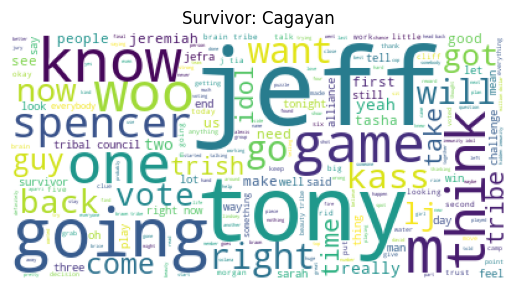

Survivor: San Juan del Sur


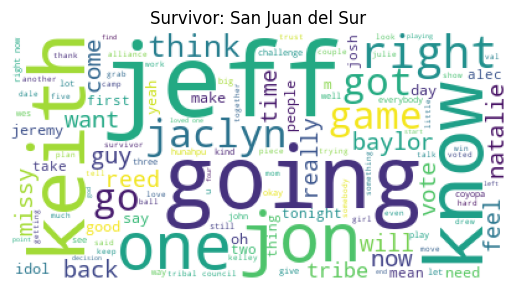

Survivor: Worlds Apart


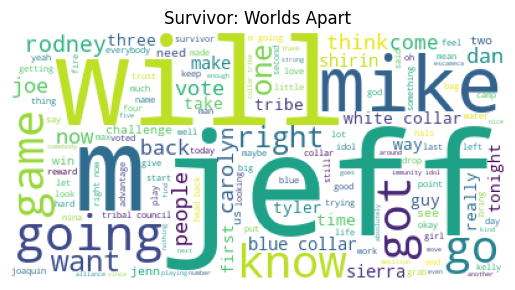

Survivor: Cambodia


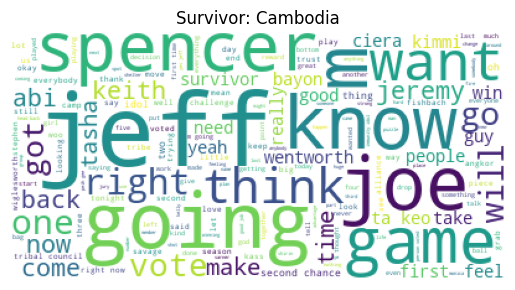

Survivor: Kaôh Rōng


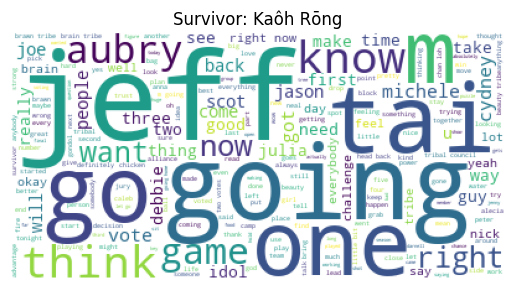

Survivor: Millennials vs Gen X


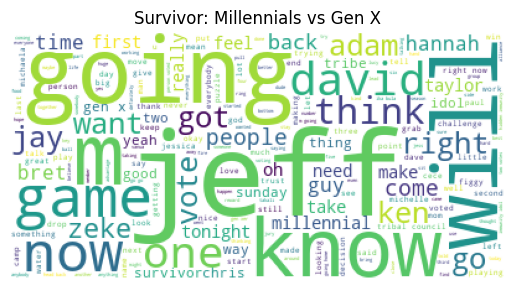

Survivor: Game Changers


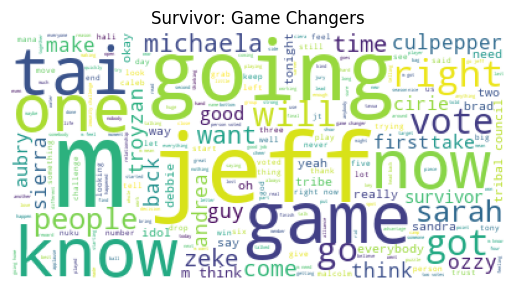

Survivor: Heroes vs Healers vs Hustlers


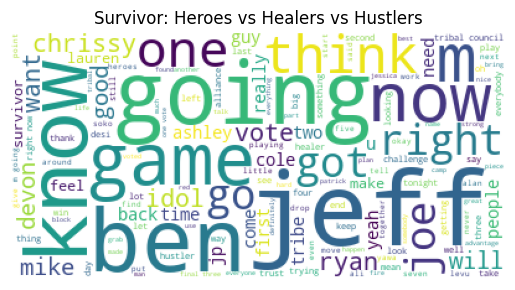

Survivor: Ghost Island


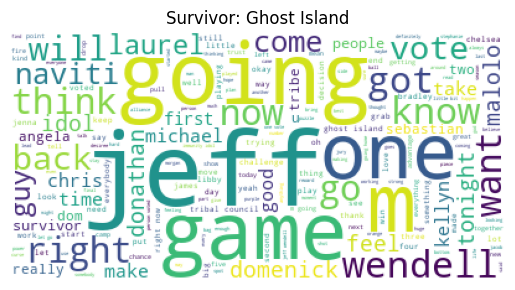

Survivor: David vs Goliath


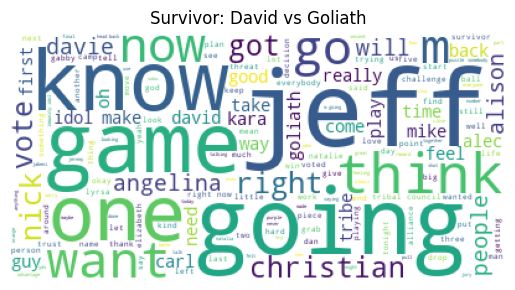

Survivor: Edge of Extinction


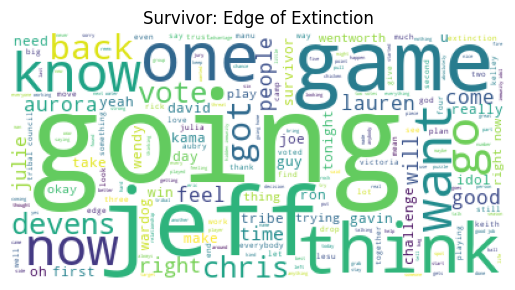

Survivor: Island of the Idols


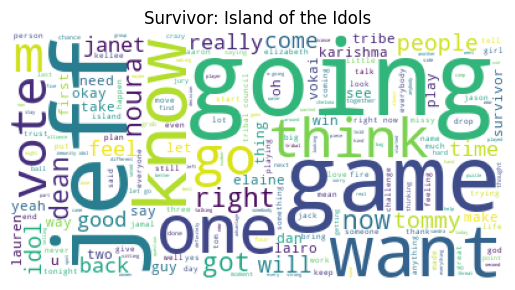

Survivor: Winners at War


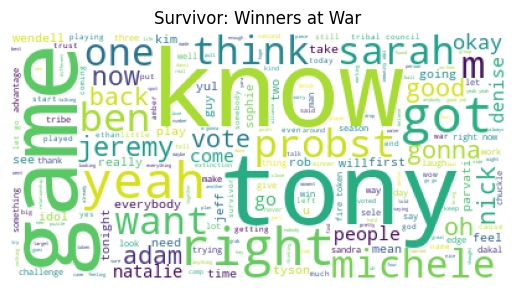

In [52]:
# wordcloud
def generate_wordcloud(data, title):
    # Join the different processed titles together.
    long_string = ','.join(list(data.values))
    # Create a WordCloud object
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
    # Generate a word cloud
    wc = wordcloud.generate(long_string)
    # Visualize the word cloud

    plt.imshow(wc)
    plt.axis('off')
    plt.title(title)
    plt.show()
    

for season in transcripts_df['Season'].unique():
    data = transcripts_df[transcripts_df['Season']==season]
    print(season)
    generate_wordcloud(data['episode_transcript_processed'], season)

In [23]:
# create ngrams
def ngrams(input, n):
   input = input.split(' ')
   output = {}
   for i in range(len(input)-n+1):
       g = ' '.join(input[i:i+n])
       output.setdefault(g, 0)
       output[g] += 1
   return output

ngrams(transcripts_df.loc[0, 'episode_transcript_processed'], 3)

<class 'dict'>


In [29]:
# Apply the ngrams function to each element in the Series
n = 3  # Choose the n-gram size
ngram_counts = transcripts_df['episode_transcript_processed'].apply(ngrams, n=n)

# Combine the dictionaries into a single Counter
combined_ngrams = Counter()
for ngram_dict in ngram_counts:
    combined_ngrams.update(ngram_dict)

# Find the most common n-grams
most_common_ngrams = combined_ngrams.most_common(10)

# Display the results
print("Most common n-grams:")
for ngram, count in most_common_ngrams:
    print(f"{ngram}: {count}")

Most common n-grams:
going to be: 3708
i don't know: 2821
a lot of: 2767
 yeah : 2731
oh my god: 2470
i'm going to: 2129
in this game: 2102
i want to: 1955
 i think: 1853
 oh my: 1812


In [30]:
# prepare for lda
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = transcripts_df.episode_transcript_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['episode', 'marooning', 'jeff', 'probst', 'tiny', 'malaysian', 'fishing', 'village', 'americans', 'beginning', 'adventure', 'lifetime', 'volunteered', 'marooned', 'days', 'mysterious', 'borneo', 'story', 'survivor', 'captioning', 'sponsored', 'cbs', 'survivor', 'productions', 'colleen', 'getting', 'two', 'box', 'jeff', 'witnessing']


In [31]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 4), (8, 1), (9, 1), (10, 4), (11, 5), (12, 3), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 6), (24, 1), (25, 1), (26, 1), (27, 5), (28, 6), (29, 2)]


In [32]:
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.016*"jeff" + 0.014*"going" + 0.012*"right" + 0.012*"go" + 0.010*"like" + 0.009*"got" + 0.009*"get" + 0.009*"back" + 0.008*"game" + 0.008*"first"'), (1, '0.013*"know" + 0.012*"jeff" + 0.012*"going" + 0.011*"probst" + 0.011*"like" + 0.011*"right" + 0.010*"got" + 0.010*"one" + 0.010*"go" + 0.009*"get"'), (2, '0.016*"know" + 0.015*"one" + 0.014*"going" + 0.014*"go" + 0.012*"probst" + 0.011*"get" + 0.011*"like" + 0.010*"jeff" + 0.010*"right" + 0.008*"game"'), (3, '0.014*"going" + 0.014*"get" + 0.012*"know" + 0.012*"jeff" + 0.012*"right" + 0.011*"go" + 0.011*"like" + 0.011*"one" + 0.009*"got" + 0.008*"back"'), (4, '0.015*"jeff" + 0.012*"know" + 0.011*"like" + 0.011*"go" + 0.011*"going" + 0.010*"right" + 0.010*"get" + 0.009*"game" + 0.009*"one" + 0.009*"got"'), (5, '0.014*"going" + 0.012*"go" + 0.012*"right" + 0.011*"know" + 0.011*"one" + 0.011*"probst" + 0.010*"like" + 0.010*"get" + 0.009*"think" + 0.008*"good"'), (6, '0.018*"jeff" + 0.014*"one" + 0.013*"like" + 0.013*"going" + 0.011

In [40]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = './results/ldavis_prepared_'+str(num_topics)
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
#     with open(LDAvis_data_filepath, 'wb') as f:
#         pickle.dump(LDAvis_prepared, f)
# # load the pre-prepared pyLDAvis data from disk
# with open(LDAvis_data_filepath, 'rb') as f:
#     LDAvis_prepared = pickle.load(f)
# pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.002283  0.001684       1        1  22.455526
1     -0.001394 -0.001536       2        1  17.056407
2     -0.004364 -0.000608       3        1  15.155826
6      0.003840 -0.002298       4        1   9.532617
3     -0.000082  0.003713       5        1   8.984369
0      0.003566  0.002804       6        1   7.462977
4      0.001463 -0.001296       7        1   5.602719
5     -0.002910 -0.000677       8        1   5.049008
9      0.001046 -0.001433       9        1   4.960942
8      0.001118 -0.000353      10        1   3.739609, topic_info=       Term          Freq         Total Category  logprob  loglift
463    jeff  23248.000000  23248.000000  Default  30.0000  30.0000
486    know  22471.000000  22471.000000  Default  29.0000  29.0000
514    like  21358.000000  21358.000000  Default  28.0000  28.0000
717   right  20095.000000  20095.000000  Default  27.0000  27.0000
365   going  26022.000000  26022.000000  Default  26.0000  26.0000
...     ...           ...           ...      ...      ...      ...
965    vote    371.353344  11710.934978  Topic10  -5.2406  -0.1649
1028   yeah    348.203259  11314.520236  Topic10  -5.3050  -0.1949
942     two    327.277567  10039.726281  Topic10  -5.3670  -0.1373
317   first    342.018755  11091.351361  Topic10  -5.3229  -0.1929
610      oh    290.779784   9640.097765  Topic10  -5.4852  -0.2149

[913 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
22446      5  0.353576  aarrgghh
8528       1  0.161727       abi
8528       2  0.141738       abi
8528       3  0.187167       abi
8528       4  0.065418       abi
...      ...       ...       ...
21870      6  0.076998      zane
21870      7  0.128329      zane
21870      8  0.025666      zane
21870      9  0.025666      zane
21870     10  0.051332      zane

[3641 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 2, 3, 7, 4, 1, 5, 6, 10, 9])